<a href="https://colab.research.google.com/github/BhawnaKochhar/image-classification/blob/master/Image_classifation_between_5_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading the data from the drive using **googledrive downloader**

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D',
                                    dest_path = '/content/animal_dataset_intermediate.zip',
                                    unzip=True, showsize=True)

224.5 MiB Done.
Unzipping...Done.


# Changing the name of the columns to the name of the class types 

In [ ]:
import os
data_path = '/content/animal_dataset_intermediate/train/'
print('cleaning folder names')
for i in os.listdir(data_path):
  os.renames(data_path + i, data_path+i.split('_')[0])


cleaning folder names


# Loading the necessary libraries and modules

In [ ]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_size = 224
class_names = ['elefante', 'farfalla', 'mucca', 'pecora', 'scoiattolo']

# Loading the data for training and validation using **image_dataset_from_directory**

In [ ]:


image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8196 files belonging to 5 classes.
Using 6557 files for training.
Found 8196 files belonging to 5 classes.
Using 1639 files for validation.
Found 910 files belonging to 1 classes.


# Model training

In [ ]:
#Augmenting the images
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_size, 
                                                              img_size,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)       

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
set_epochs = 15

history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs = set_epochs,
            callbacks=[callback],
            )

Epoch 1/15
205/205 [==============================] - 20s 99ms/step - loss: 1.3816 - accuracy: 0.4000 - val_loss: 1.4134 - val_accuracy: 0.4094
Epoch 2/15
205/205 [==============================] - 20s 99ms/step - loss: 1.2039 - accuracy: 0.4972 - val_loss: 1.1241 - val_accuracy: 0.5638
Epoch 3/15
205/205 [==============================] - 20s 99ms/step - loss: 1.1023 - accuracy: 0.5440 - val_loss: 1.1007 - val_accuracy: 0.5497
Epoch 4/15
205/205 [==============================] - 20s 99ms/step - loss: 1.0221 - accuracy: 0.5804 - val_loss: 1.0396 - val_accuracy: 0.5741
Epoch 5/15
205/205 [==============================] - 20s 99ms/step - loss: 0.9435 - accuracy: 0.6250 - val_loss: 0.8624 - val_accuracy: 0.6687
Epoch 6/15
205/205 [==============================] - 20s 99ms/step - loss: 0.8812 - accuracy: 0.6523 - val_loss: 0.8983 - val_accuracy: 0.6504
Epoch 7/15
205/205 [==============================] - 20s 99ms/step - loss: 0.8473 - accuracy: 0.6611 - val_loss: 0.8260 - val_accuracy:

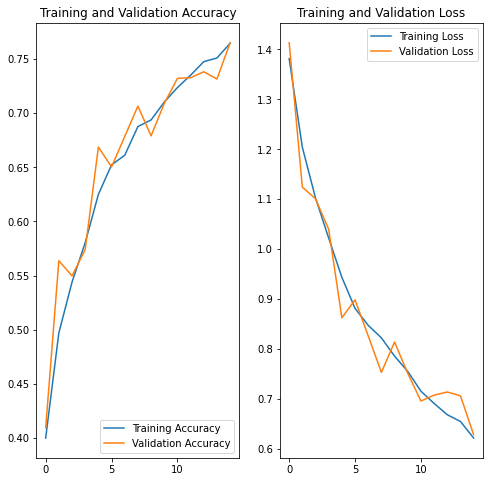

In [ ]:
epochs = set_epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Loading testing data to make predictions

In [ ]:
test_generator = image_dataset_from_directory(
    "animal_dataset_intermediate/test_",
    label_mode=None,
    image_size=image_size,
    shuffle=False,
    batch_size = 1,
)

Found 910 files belonging to 1 classes.


In [ ]:
# getting the names of the files in the alphanumeric order
# as "image_dataset_from_directory" load the testing data into alphanumeric order

path = "animal_dataset_intermediate/test_/test"
file_names = []
files = glob.glob(path+"/*")
for f in files:
  file_name = f.split("/")[-1]
  file_names.append(file_name)

file_names = sorted(file_names, key = str)


In [ ]:
# make predictions on the testing data
preds = model.predict(test_generator)
predicted_labels  = np.argmax(preds,axis=1)

#Accessing classnames with predicted clases
final_predictions = [class_names[i] for i in predicted_labels]


In [ ]:
# loading the csv file to compare the filenames for submitting the final predictions
final = pd.read_csv("animal_dataset_intermediate/Testing_set_animals.csv")

In [ ]:
final.head()

,filename,target
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN


In [ ]:
# comapring the filenames and getting the final predictions as per the csv file
values = []
for fname in final['filename']:
  for index in range(len(file_names)):
    if fname == file_names[index]:
      values.append(final_predictions[index])

final['target'] = values


In [ ]:
# visualizing the predicted catgories on the testing dataset
print(values)

['farfalla', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'elefante', 'pecora', 'scoiattolo', 'pecora', 'scoiattolo', 'elefante', 'elefante', 'elefante', 'pecora', 'farfalla', 'elefante', 'elefante', 'scoiattolo', 'mucca', 'scoiattolo', 'elefante', 'pecora', 'pecora', 'pecora', 'pecora', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'scoiattolo', 'scoiattolo', 'scoiattolo', 'mucca', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'pecora', 'pecora', 'elefante', 'elefante', 'elefante', 'elefante', 'elefante', 'elefante', 'farfalla', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'farfalla', 'elefante', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'farfalla', 'farfalla', 'scoiattolo', 'scoiattolo', 'pecora', 'farfalla', 'farfalla', 'mucca', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'pecora', 'scoiattolo', 'elefante', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'elefante', 'farfalla', 'f